# **주제**  
### : 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

# **배경 및 대회 설명**
### - 신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정  
### - 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대금 연체 가능성을 예측  
### - 목표 : 신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측

---

# **1. 변수 설명**

- index<br>
- gender: 성별<br>
- car: 차량 소유 여부<br>
- reality: 부동산 소유 여부<br>
- child_num: 자녀 수<br>
- income_total: 연간 소득<br>
- income_type: 소득 분류<br>
	['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']<br>
- edu_type: 교육 수준<br>
	['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부<br>
	['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']<br>
- house_type: 생활 방식<br>
	['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']<br>
- DAYS_BIRTH: 출생일<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미<br>
- DAYS_EMPLOYED: 업무 시작일<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미<br>
	=> 양수 값은 고용되지 않은 상태를 의미함<br>
- FLAG_MOBIL: 핸드폰 소유 여부<br>
- work_phone: 업무용 전화 소유 여부<br>
- phone: 전화 소유 여부<br>
- email: 이메일 소유 여부<br>
- occyp_type: 직업 유형<br>
	[nan, 'Laborers', 'Managers', 'Sales staff','High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',<br>
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff','Private service staff', 'Cooking staff', 'Secretaries',<br>
       'HR staff', 'IT staff', 'Low-skill Laborers','Waiters/barmen staff']<br>											
- family_size: 가족 규모<br>
- begin_month: 신용카드 발급 월<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미<br>
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도<br>
	=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

### - FLAG_MOBIL / OCCYP_TYPE DROP

---

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
submission = pd.read_csv('../Data/sample_submission.csv')

In [3]:
train['credit']

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 26457, dtype: float64

In [4]:
corr = train.corr()
corr

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
index,1.000000,0.001012,0.009848,-0.008901,0.004259,NaN,-0.005575,-0.001790,0.005332,-0.002867,0.002181,-0.007841
child_num,0.001012,1.000000,0.032186,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,0.890530,-0.007229,0.004081
income_total,0.009848,0.032186,1.000000,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,0.023839,-0.018047,0.008555
DAYS_BIRTH,-0.008901,0.332816,0.064155,1.000000,-0.616776,NaN,0.178752,-0.029247,0.111238,0.298108,0.057306,-0.025187
DAYS_EMPLOYED,0.004259,-0.228159,-0.166478,-0.616776,1.000000,NaN,-0.241827,-0.007749,-0.091090,-0.223077,0.007964,-0.003798
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,-0.005575,0.051521,-0.034207,0.178752,-0.241827,NaN,1.000000,0.310256,-0.031048,0.068705,-0.008563,-0.003134
phone,-0.001790,-0.010555,0.019013,-0.029247,-0.007749,NaN,0.310256,1.000000,0.012494,-0.000132,-0.014286,0.003452
email,0.005332,0.016120,0.089882,0.111238,-0.091090,NaN,-0.031048,0.012494,1.000000,0.016122,0.002320,0.014812
family_size,-0.002867,0.890530,0.023839,0.298108,-0.223077,NaN,0.068705,-0.000132,0.016122,1.000000,-0.023032,0.008227


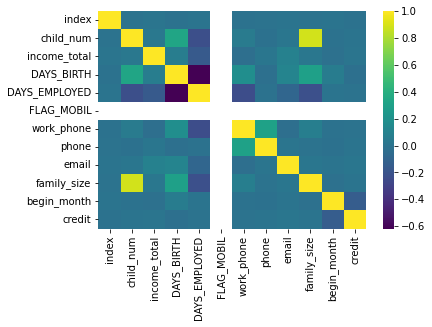

In [5]:
sns.heatmap(corr, cmap='viridis')
plt.show()

---

# 0. 파생변수 생성하기

numeric 변수는 최대한 다양한 특징을 보일 수 있도록 생성  
category 변수는 여러가지를 조합해 보았지만 전체 변수를 합친 ID 하나만 만들었을때 가장 logloss가 낮았음

# 1. 연속형변수(income_total, DAYS_BIRTH, DAYS_EMPLOYED, begin_month) scaling

In [6]:
# begin_month는 12로 나눠서 scaling, days_employed / days_birth 는 365로 나눠서 스케일링

1. INCOME_TOTAL -> minmaxscaling 처리해주기

In [7]:
type(train['income_total'])

pandas.core.series.Series

In [8]:
''' def __minmaxscaler(train_column, test_column, columns_name):
    x = pd.DataFrame(train_column)
    y = pd.DataFrame(test_column)
    
    scaler = MinMaxScaler()
    
    x_scaled = scaler.fit_transform(x)
    y_scaled = scaler.transform(y)

    train[columns_name] = x_scaled
    test[columns_name] = y_scaled '''

' def __minmaxscaler(train_column, test_column, columns_name):\n    x = pd.DataFrame(train_column)\n    y = pd.DataFrame(test_column)\n    \n    scaler = MinMaxScaler()\n    \n    x_scaled = scaler.fit_transform(x)\n    y_scaled = scaler.transform(y)\n\n    train[columns_name] = x_scaled\n    test[columns_name] = y_scaled '

In [9]:
# columns_name = 'income_total'
# __minmaxscaler(train['income_total'],test['income_total'], columns_name)

In [10]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


1-2. INCOME_TOTAL -> robust_scaling 처리해주기

In [11]:
def __robustscaler(train_column, test_column, columns_name):
    x = pd.DataFrame(train_column)
    y = pd.DataFrame(test_column)
    
    scaler = RobustScaler()
    
    x_scaled = scaler.fit_transform(x)
    y_scaled = scaler.transform(y)

    train[columns_name] = x_scaled
    test[columns_name] = y_scaled

In [12]:
columns_name = 'income_total'
__robustscaler(train['income_total'],test['income_total'], columns_name)

In [13]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,-0.434783,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,-0.217391,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,-0.851478,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,-0.434783,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,0.652174,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


### 2. DAYS_BIRTH

In [14]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])   #음수값 처리
test['DAYS_BIRTH'] = abs(test['DAYS_BIRTH'])   #음수값 처리

### 3. DAYS_EMPLOYED

In [15]:
train['DAYS_EMPLOYED']

0       -4709
1       -1540
2       -4434
3       -2092
4       -2105
         ... 
26452   -1984
26453   -2475
26454   -2015
26455    -107
26456   -1013
Name: DAYS_EMPLOYED, Length: 26457, dtype: int64

In [16]:
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'].count()

4438

In [17]:
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED']=0
test.loc[test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED']=0

In [18]:
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'].count()

0

In [19]:
train['DAYS_EMPLOYED'] = -train['DAYS_EMPLOYED']
test['DAYS_EMPLOYED'] = -test['DAYS_EMPLOYED']

### 4. begin_month

In [20]:
train['begin_month']

0        -6.0
1        -5.0
2       -22.0
3       -37.0
4       -26.0
         ... 
26452    -2.0
26453   -47.0
26454   -25.0
26455   -59.0
26456    -9.0
Name: begin_month, Length: 26457, dtype: float64

# 2. 연속형 변수 제외한 변수 -> 범주형 변수 처리

1. occyp_type, FLAG_MOBIL DROP함

In [21]:
train = train.drop(['occyp_type','FLAG_MOBIL'], axis=1)
test = test.drop(['occyp_type','FLAG_MOBIL'], axis=1)
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

5. phone : 전화 소유 1, 전화 무소유 0

In [22]:
train['phone'] = train['phone'].replace([1,0], ['Y','N'])
test['phone'] = test['phone'].replace([1,0], ['Y','N'])

6. email : 이메일 소유 1, 이메일 무소유 0

In [23]:
train['email'] = train['email'].replace([1,0], ['Y','N'])
test['email'] = test['email'].replace([1,0], ['Y','N'])
train['email']

0        N
1        Y
2        N
3        N
4        N
        ..
26452    N
26453    N
26454    N
26455    N
26456    N
Name: email, Length: 26457, dtype: object

7. family_size

In [81]:
train['family_size'].sort_values(ascending=False).value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [237]:
(train['family_size']==7).count()

26457

In [238]:
train.loc[train['family_size']==6, 'family_size']=(train['family_size']==7 + train['family_size']==15 + train['family_size']==9 + train['family_size']==9)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

9. child_num 

In [24]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [25]:
train.loc[train['child_num']>=1,'child_num'] = 1
test.loc[test['child_num']>=1,'child_num'] = 1

In [26]:
train['child_num'].value_counts()

0    18340
1     8117
Name: child_num, dtype: int64

In [27]:
train['child_num'] = train['child_num'].replace([1,0],['Y','N'])
test['child_num'] = test['child_num'].replace([1,0],['Y','N'])

In [28]:
train['child_num']

0        N
1        Y
2        N
3        N
4        N
        ..
26452    Y
26453    Y
26454    N
26455    N
26456    N
Name: child_num, Length: 26457, dtype: object

10. work_phone

In [29]:
train['work_phone'] = train['work_phone'].replace([1,0],['Y','N'])
test['work_phone'] = test['work_phone'].replace([1,0],['Y','N'])

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  object 
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  work_phone     26457 non-null  object 
 13  phone          26457 non-null  object 
 14  email          26457 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

### 11. income_type

In [31]:
train['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [32]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [33]:
train['income_type'] = train['income_type'].replace({'Student' : 'Pensioner'})
test['income_type'] = test['income_type'].replace({'Student' : 'Pensioner'})

In [34]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4456
State servant            2154
Name: income_type, dtype: int64

### 12. edu_type    중등 / 고등 / 중졸 / 초졸 / 학.석.박  

In [35]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [36]:
train['edu_type'] = train['edu_type'].replace({'Academic degree' : 'Higher education'})
train['edu_type'] = train['edu_type'].replace({'Lower secondary' : 'Incomplete higher'})

test['edu_type'] = test['edu_type'].replace({'Academic degree' : 'Higher education'})
test['edu_type'] = test['edu_type'].replace({'Lower secondary' : 'Incomplete higher'})

In [37]:
train['edu_type'].value_counts()
test['edu_type'].value_counts()

Secondary / secondary special    6782
Higher education                 2711
Incomplete higher                 507
Name: edu_type, dtype: int64

### 13. house_type
House / apartment<br>     
With parents<br>            
Municipal apartment<br>  시립아파트
Rented apartment<br>  임대아파트      
Office apartment<br>  오피스텔       
Co-op apartment<br>  협동?

In [38]:
train['house_type'].unique()

array(['Municipal apartment', 'House / apartment', 'With parents',
       'Co-op apartment', 'Rented apartment', 'Office apartment'],
      dtype=object)

In [39]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [40]:
train['house_type'] = train['house_type'].replace({'Co-op apartment' : 'Office apartment'})
train['house_type'] = train['house_type'].replace({'Rented apartment' : 'Municipal apartment'})

test['house_type'] = test['house_type'].replace({'Co-op apartment' : 'Office apartment'})
test['house_type'] = test['house_type'].replace({'Rented apartment' : 'Municipal apartment'})

In [41]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment     1247
Office apartment         300
Name: house_type, dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  object 
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  work_phone     26457 non-null  object 
 13  phone          26457 non-null  object 
 14  email          26457 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

In [201]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  object 
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  work_phone     10000 non-null  object 
 13  phone          10000 non-null  object 
 14  email          10000 non-null  object 
 15  family_size    10000 non-null  float64
 16  begin_month    10000 non-null  float64
dtypes: float64(3), int64(3), object(11)
memory usage: 1

In [202]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,N,0.434783,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,N,N,N,2.0,-6.0,1.0
1,1,F,N,Y,Y,0.869565,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,N,N,Y,3.0,-5.0,1.0
2,2,M,Y,Y,N,2.826087,Working,Higher education,Married,House / apartment,19087,4434,N,Y,N,2.0,-22.0,2.0
3,3,F,N,Y,N,0.434783,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,N,Y,N,2.0,-37.0,0.0
4,4,F,Y,Y,N,0.000000,State servant,Higher education,Married,House / apartment,15037,2105,N,N,N,2.0,-26.0,2.0


In [103]:
#파생변수 생성하고 싶은데 일단은 중단함
''' for df in [train,test]:
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
    df['income_mean'] = df['income_total'] / df['family_size'] '''

" for df in [train,test]:\n    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])\n    df['income_mean'] = df['income_total'] / df['family_size'] "

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  object 
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  work_phone     26457 non-null  object 
 13  phone          26457 non-null  object 
 14  email          26457 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

# 3. 중복데이터 제거

In [ ]:
# train['identity'] = [str(i) + str(j) + str(k) + str(l) + str(m) for i,j,k,l,m in zip(train['gender'],train['income_total'],train['income_type'],train['DAYS_BIRTH'],train['DAYS_EMPLOYED'])]
# test['identity'] = [str(i) + str(j) + str(k) + str(l) + str(m) for i,j,k,l,m in zip(test['gender'],test['income_total'],test['income_type'],test['DAYS_BIRTH'],test['DAYS_EMPLOYED'])]

# print(f"train set 중복데이터가 아닌 사람의 수 : {sum(train['identity'].value_counts()==1)}명")
# print(f"test set 중복데이터가 아닌 사람의 수 : {sum(test['identity'].value_counts()==1)}명")
# print('-'*60)
# print(f"train set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(train['identity'].value_counts()>=2)}명")
# print(f"test set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(test['identity'].value_counts()>=2)}명")

In [43]:
train_x = train.drop(['index', 'credit'], axis =1)
test_x = test.drop('index', axis = 1)
train_y = train[['credit']]

In [44]:
print(train_x.shape, train_y.shape, test_x.shape)

(26457, 16) (26457, 1) (10000, 16)


In [45]:
train_x = pd.get_dummies(train_x, drop_first= True)
test_x = pd.get_dummies(test_x, drop_first= True)
type(train_x)
train_x

#train_x 형태 확인하기 위해 dataframe형태로 변환
# train_x = pd.DataFrame(train_x)
# train_x

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_M,car_Y,reality_Y,child_num_Y,income_type_Pensioner,...,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Municipal apartment,house_type_Office apartment,house_type_With parents,work_phone_Y,phone_Y,email_Y
0,0.434783,13899,4709,2.0,-6.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.869565,11380,1540,3.0,-5.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2.826087,19087,4434,2.0,-22.0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.434783,15088,2092,2.0,-37.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.000000,15037,2105,2.0,-26.0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0.652174,12079,1984,4.0,-2.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
26453,0.217391,15291,2475,2.0,-47.0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
26454,1.304348,10082,2015,2.0,-25.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26455,0.130435,10145,107,1.0,-59.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
corr = train_x.corr()
corr

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_M,car_Y,reality_Y,child_num_Y,income_type_Pensioner,...,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Municipal apartment,house_type_Office apartment,house_type_With parents,work_phone_Y,phone_Y,email_Y
income_total,1.000000,-0.064155,0.086899,0.023839,-0.018047,0.198455,0.213432,0.035377,0.047177,-0.165511,...,0.002221,0.017237,0.019539,-0.043119,0.008879,0.030944,-0.020076,-0.034207,0.019013,0.089882
DAYS_BIRTH,-0.064155,1.000000,-0.020244,-0.298108,-0.057306,-0.201138,-0.156883,0.130241,-0.383171,0.619686,...,-0.016327,0.055194,-0.098286,0.226599,-0.041752,-0.018115,-0.200310,-0.178752,0.029247,-0.111238
DAYS_EMPLOYED,0.086899,-0.020244,1.000000,0.055657,-0.082669,-0.033930,0.004348,-0.038546,0.041516,-0.415909,...,0.050562,0.017470,-0.027017,-0.067753,0.001549,0.016046,-0.027285,0.108538,0.041886,0.002904
family_size,0.023839,-0.298108,0.055657,1.000000,-0.023032,0.111060,0.149463,-0.006667,0.779027,-0.223340,...,0.497741,-0.224942,-0.433840,-0.254990,-0.023244,0.026070,0.016196,0.068705,-0.000132,0.016122
begin_month,-0.018047,-0.057306,-0.082669,-0.023032,1.000000,0.007707,-0.029955,0.003863,-0.003604,0.006156,...,-0.043116,-0.004098,0.046252,0.005207,0.016595,-0.010779,0.021438,-0.008563,-0.014286,0.002320
gender_M,0.198455,-0.201138,-0.033930,0.111060,0.007707,1.000000,0.362320,-0.048927,0.077924,-0.174990,...,0.106631,-0.067106,-0.005108,-0.137504,0.017855,0.039952,0.049384,0.064316,-0.027078,0.000108
car_Y,0.213432,-0.156883,0.004348,0.149463,-0.029955,0.362320,1.000000,-0.016599,0.100411,-0.160271,...,0.145389,-0.063363,-0.084080,-0.088393,-0.013063,0.027271,0.021840,0.026124,-0.013730,0.018904
reality_Y,0.035377,0.130241,-0.038546,-0.006667,0.003863,-0.048927,-0.016599,1.000000,-0.003189,0.097812,...,-0.000125,-0.008326,0.006896,0.029714,-0.116188,-0.044303,-0.150140,-0.208648,-0.065553,0.051085
child_num_Y,0.047177,-0.383171,0.041516,0.779027,-0.003604,0.077924,0.100411,-0.003189,1.000000,-0.263701,...,0.138922,-0.010913,-0.136399,-0.108826,0.004804,0.019321,0.040205,0.041974,-0.015006,0.035025
income_type_Pensioner,-0.165511,0.619686,-0.415909,-0.223340,0.006156,-0.174990,-0.160271,0.097812,-0.263701,1.000000,...,-0.054627,0.001206,-0.025294,0.211829,-0.023840,-0.031027,-0.098613,-0.241342,-0.006911,-0.090033


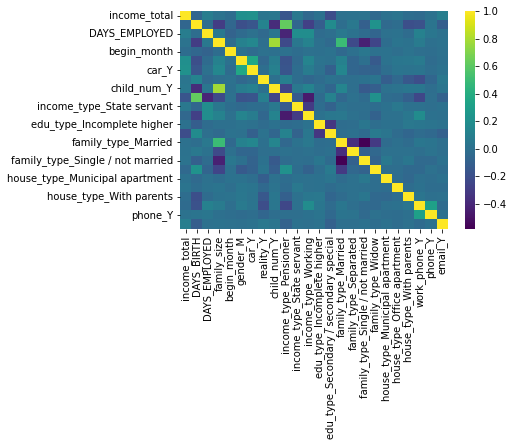

In [47]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [110]:
# 이 히트맵으로 상관관계 높은 애들 파생변수 만들어볼까???

In [111]:
# 이게 실제 값
train_y

,credit
0,1.0
1,1.0
2,2.0
3,0.0
4,2.0
...,...
26452,1.0
26453,2.0
26454,2.0
26455,2.0


In [112]:
from sklearn.model_selection import train_test_split

In [74]:
#lgbm

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


lgbm_clf=LGBMClassifier()
lgbm_clf.fit(X_train, y_train.values.ravel())
y_pred=lgbm_clf.predict_proba(X_val)

print(f"lgbm_log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 26)
(19842, 1)
Validation set: 
(6615, 26)
(6615, 1)
lgbm_log_loss: 0.761427372770255


In [113]:
#catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)



#param 조금 수정함 -> 오버피팅 개심함.. 왜지?ㅠㅠ
""" cat_clf=CatBoostClassifier(n_estimators=3000, max_depth=8, random_seed=1042, learning_rate=0.04, bootstrap_type ='Bernoulli')
cat_clf.fit(X_train, y_train,early_stopping_rounds=50,silent = True) """
cat_clf=CatBoostClassifier()
cat_clf.fit(X_train, y_train)



#y_pred=cat_clf.predict_proba(X_val)
#proba : 확률로 만듬

y_pred=cat_clf.predict(X_val)

#print(f"cat_log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")


Train set: 
(19842, 24)
(19842, 1)
Validation set: 
(6615, 24)
(6615, 1)
Learning rate set to 0.092151
0:	learn: 1.0468416	total: 16.7ms	remaining: 16.7s
1:	learn: 1.0058502	total: 32ms	remaining: 16s
2:	learn: 0.9722969	total: 45.3ms	remaining: 15.1s
3:	learn: 0.9454895	total: 59ms	remaining: 14.7s
4:	learn: 0.9227515	total: 75.2ms	remaining: 15s
5:	learn: 0.9045764	total: 87.7ms	remaining: 14.5s
6:	learn: 0.8887566	total: 101ms	remaining: 14.3s
7:	learn: 0.8756440	total: 113ms	remaining: 14s
8:	learn: 0.8644625	total: 128ms	remaining: 14.1s
9:	learn: 0.8552858	total: 142ms	remaining: 14.1s
10:	learn: 0.8472499	total: 157ms	remaining: 14.1s
11:	learn: 0.8408089	total: 176ms	remaining: 14.5s
12:	learn: 0.8355662	total: 193ms	remaining: 14.7s
13:	learn: 0.8306163	total: 206ms	remaining: 14.5s
14:	learn: 0.8267446	total: 224ms	remaining: 14.7s
15:	learn: 0.8233873	total: 244ms	remaining: 15s
16:	learn: 0.8206699	total: 266ms	remaining: 15.4s
17:	learn: 0.8177032	total: 280ms	remaining: 1

In [114]:
y_pred.shape

(6615, 1)

In [115]:
y_pred

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [116]:
type(y_pred)

numpy.ndarray

In [117]:
y_val

,credit
36,2.0
3464,2.0
2640,2.0
22500,1.0
17275,1.0
...,...
6806,1.0
23096,2.0
7756,2.0
23331,2.0


In [336]:
type(y_val)

pandas.core.frame.DataFrame

In [145]:
print(type(y_pred_df.iloc[2,]))
print(type(y_val.iloc[1,]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [153]:
#y_pred_df[0][0]
y_val.index[0]     #실제 데이터셋의 인덱스 -> 여기서 append 시켜야함
y_val.index

Int64Index([   36,  3464,  2640, 22500, 17275, 14665, 23257, 25732,  1955,
            17609,
            ...
            12172,  3781, 13275, 11909, 21646,  6806, 23096,  7756, 23331,
            25457],
           dtype='int64', length=6615)

In [123]:
#y_pred랑 y_val 값 비교해서 다른것의 인덱스만 추출-> 이 인덱스랑 중복데이터 인덱스랑 비교.
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,2.0
1,2.0
2,2.0
3,1.0
4,1.0
...,...
6610,2.0
6611,2.0
6612,2.0
6613,2.0


In [143]:
column_list=[]
for i in range(len(y_pred_df)):
    if(y_pred_df.iloc[i,]!=y_val.iloc[i,]):
        column_list.append(y_val.index[i])


ValueError: Can only compare identically-labeled Series objects

C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


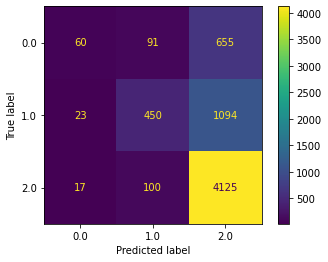

In [122]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cat_clf, X_val, y_val)  
plt.show()

In [289]:
X_val

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_M,car_Y,reality_Y,child_num_Y,income_type_Pensioner,...,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Municipal apartment,house_type_Office apartment,house_type_With parents,work_phone_Y,phone_Y,email_Y
36,0.652174,20200,1022,1.0,-14.0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3464,2.260870,16995,7264,2.0,-31.0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2640,-0.913043,15921,8063,2.0,-38.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
22500,1.956522,16250,747,3.0,-1.0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
17275,0.434783,10886,742,2.0,-3.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,1.086957,18114,10121,2.0,-32.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
23096,0.434783,16896,354,2.0,-60.0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
7756,-0.913043,19708,7500,2.0,-33.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23331,-0.826087,22314,0,2.0,-17.0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0


In [290]:
y_val

,credit
36,2.0
3464,2.0
2640,2.0
22500,1.0
17275,1.0
...,...
6806,1.0
23096,2.0
7756,2.0
23331,2.0


In [291]:
y_pred

array([[0.03736819, 0.10955805, 0.85307376],
       [0.04190234, 0.13757334, 0.82052431],
       [0.05521189, 0.17554158, 0.76924653],
       ...,
       [0.01912902, 0.1298194 , 0.85105158],
       [0.03267251, 0.42840586, 0.53892163],
       [0.06878984, 0.19358497, 0.73762519]])

In [286]:
confusion_matrix(y_val, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [148]:
X_val

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,gender_M,car_Y,reality_Y,child_num_Y,income_type_Pensioner,income_type_State servant,...,family_type_Widow,house_type_Municipal apartment,house_type_Office apartment,house_type_With parents,work_phone_Y,phone_Y,email_Y,family_size_b,family_size_c,family_size_d
36,0.652174,20200,-1022,-14.0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3464,2.260870,16995,-7264,-31.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2640,-0.913043,15921,-8063,-38.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
22500,1.956522,16250,-747,-1.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
17275,0.434783,10886,-742,-3.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,1.086957,18114,-10121,-32.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23096,0.434783,16896,-354,-60.0,1,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
7756,-0.913043,19708,-7500,-33.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23331,-0.826087,22314,0,-17.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0


<BarContainer object of 26 artists>

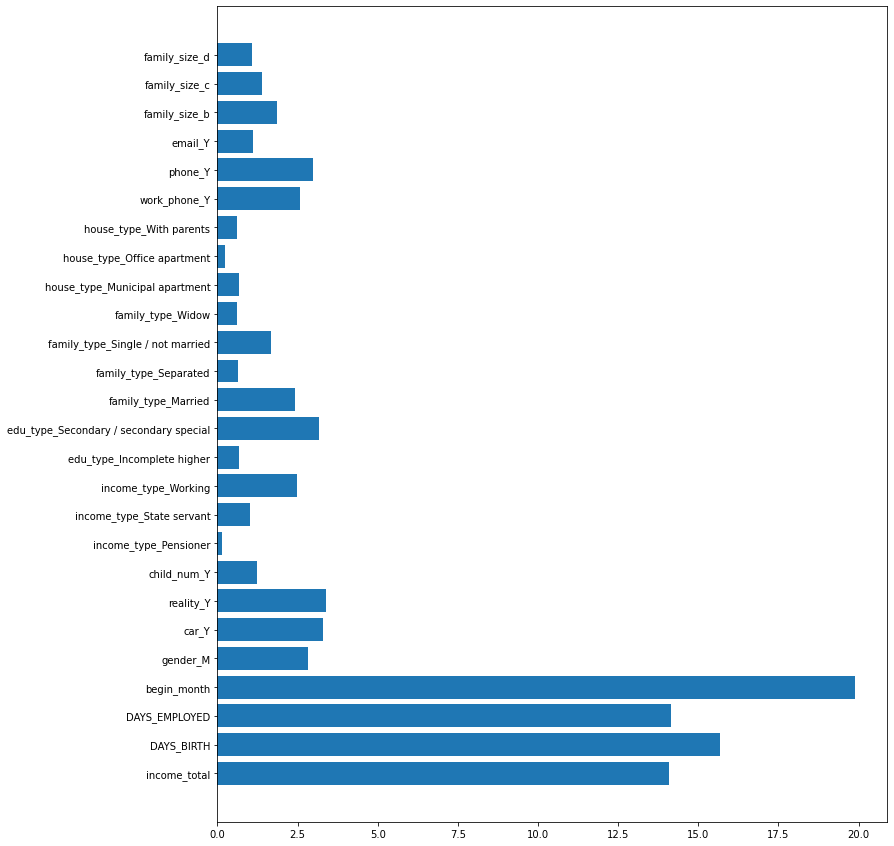

In [192]:
# feature_importance_in_catboost
import matplotlib.pyplot as plt

cat_clf.get_feature_importance()
plt.figure(figsize=(12,15))
plt.barh(X_train.columns, cat_clf.get_feature_importance())

---

# **STACKING 연습**

In [48]:
#from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
#X, y = load_iris(return_X_y=True)

estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('gbm', GradientBoostingClassifier(random_state=42)),
     ('lgbm', LGBMClassifier()),
     ('cat', CatBoostClassifier()),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     train_x, train_y, stratify=train_y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)

Learning rate set to 0.092151
0:	learn: 1.0471105	total: 154ms	remaining: 2m 33s
1:	learn: 1.0058677	total: 162ms	remaining: 1m 20s
2:	learn: 0.9728152	total: 169ms	remaining: 56.3s
3:	learn: 0.9459497	total: 178ms	remaining: 44.4s
4:	learn: 0.9247128	total: 186ms	remaining: 37.1s
5:	learn: 0.9063118	total: 195ms	remaining: 32.3s
6:	learn: 0.8905755	total: 204ms	remaining: 28.9s
7:	learn: 0.8775333	total: 213ms	remaining: 26.4s
8:	learn: 0.8663345	total: 223ms	remaining: 24.5s
9:	learn: 0.8569771	total: 232ms	remaining: 23s
10:	learn: 0.8490376	total: 241ms	remaining: 21.7s
11:	learn: 0.8425521	total: 252ms	remaining: 20.7s
12:	learn: 0.8371944	total: 266ms	remaining: 20.2s
13:	learn: 0.8322326	total: 277ms	remaining: 19.5s
14:	learn: 0.8283268	total: 289ms	remaining: 19s
15:	learn: 0.8248871	total: 299ms	remaining: 18.4s
16:	learn: 0.8220495	total: 308ms	remaining: 17.8s
17:	learn: 0.8191055	total: 317ms	remaining: 17.3s
18:	learn: 0.8166551	total: 325ms	remaining: 16.8s
19:	learn: 0.

0.708087679516251

In [53]:
y_pred = clf.predict_proba(test_x)         #test_x는 그냥 test셋
y_pred.shape

(10000, 3)

In [54]:
from sklearn.metrics import accuracy_score, log_loss

In [55]:
#내꺼
y_test_proba = clf.predict_proba(X_test)

from tensorflow.keras.utils import to_categorical
print(f"stacking_log_loss: {log_loss(to_categorical(y_test['credit']), y_test_proba)}")

stacking_log_loss: 0.7307158494828063


In [211]:
submission.loc[:,1:] = y_pred
submission

,index,0,1,2
0,26457,0.069926,0.145232,0.784842
1,26458,0.099967,0.242202,0.657831
2,26459,0.091729,0.111343,0.796928
3,26460,0.070748,0.096679,0.832573
4,26461,0.094555,0.209813,0.695632
...,...,...,...,...
9995,36452,0.152480,0.189768,0.657751
9996,36453,0.375298,0.193768,0.430934
9997,36454,0.046238,0.082437,0.871326
9998,36455,0.305525,0.193957,0.500518


In [212]:
submission.to_csv('../Data/Stacking_HJ1.csv', index=False)

---

In [287]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train.values.ravel())
        
        predictions=clf.predict_proba(X_val)
       
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cat_clf)

Learning rate set to 0.092455
0:	learn: 1.0469285	total: 20.9ms	remaining: 20.9s
1:	learn: 1.0056432	total: 42.8ms	remaining: 21.3s
2:	learn: 0.9724646	total: 60.2ms	remaining: 20s
3:	learn: 0.9453032	total: 77.1ms	remaining: 19.2s
4:	learn: 0.9225769	total: 92.4ms	remaining: 18.4s
5:	learn: 0.9042132	total: 106ms	remaining: 17.6s
6:	learn: 0.8887541	total: 122ms	remaining: 17.3s
7:	learn: 0.8757434	total: 137ms	remaining: 16.9s
8:	learn: 0.8652928	total: 154ms	remaining: 17s
9:	learn: 0.8559975	total: 165ms	remaining: 16.3s
10:	learn: 0.8484074	total: 175ms	remaining: 15.8s
11:	learn: 0.8420157	total: 186ms	remaining: 15.3s
12:	learn: 0.8367391	total: 194ms	remaining: 14.8s
13:	learn: 0.8316253	total: 205ms	remaining: 14.4s
14:	learn: 0.8277802	total: 216ms	remaining: 14.2s
15:	learn: 0.8243606	total: 231ms	remaining: 14.2s
16:	learn: 0.8214412	total: 242ms	remaining: 14s
17:	learn: 0.8185644	total: 262ms	remaining: 14.3s
18:	learn: 0.8160402	total: 273ms	remaining: 14.1s
19:	learn: 0

C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



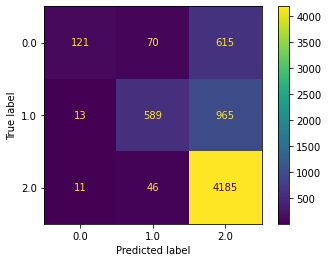

In [288]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cat_clf, X_val, y_val)  
plt.show()

In [219]:
""" from sklearn import tree
cat_clf = tree.DecisionTreeClassifier(random_state=0)
tree.plot_tree(cat_clf) """

' from sklearn import tree\ncat_clf = tree.DecisionTreeClassifier(random_state=0)\ntree.plot_tree(cat_clf) '

In [202]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
import warnings

In [ ]:
"""  export_graphviz(cat_clf, out_file="tree.dot", class_names=iris_data.target_names, 
               feature_names = iris_data.feature_names, impurity=True, filled=True)"""

In [143]:
submission.loc[:,1:] = my_submission

C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [144]:
submission.to_csv('../Data/catboost_robust_HJ4.csv', index= False)